In [ ]:
from google.colab import  drive
drive.mount('/content/Gdrive/')

Mounted at /content/Gdrive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df =pd.read_csv('/content/Gdrive/MyDrive/Life Expectancy Data.csv')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
pd.DataFrame(df.isna().sum())

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


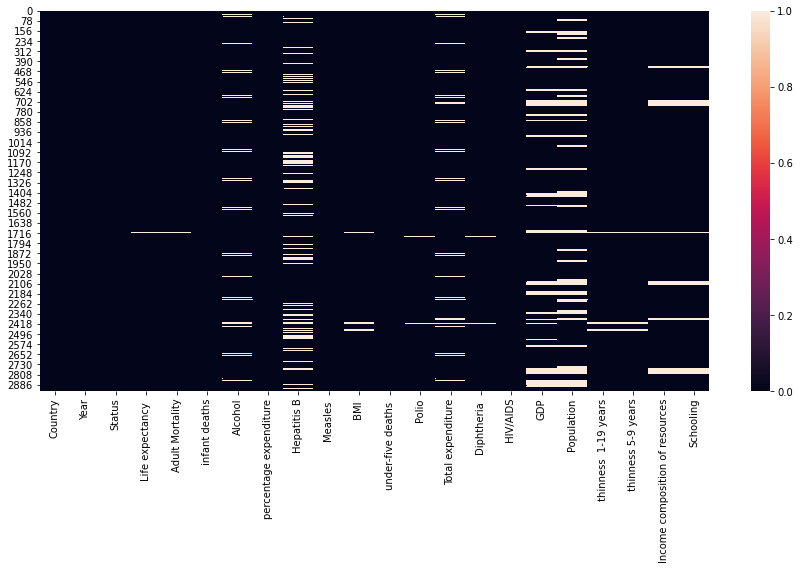

In [ ]:


plt.rcParams['figure.figsize'] =(15,7) #plt.rcParams["figure.figsize"] = (20,3)
sns.heatmap(df.isna())

plt.show()



*   The most number of NaN values is present in GDP and Population .




In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
len(df['Country'].unique())

193

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

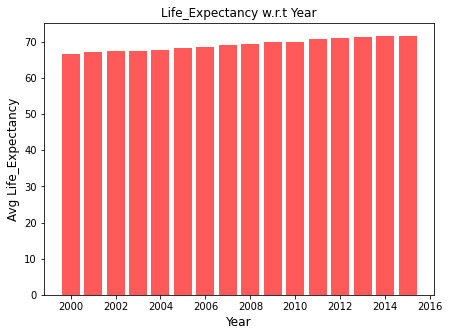

In [ ]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index, df.groupby('Year')['Life expectancy '].mean(),color='red',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

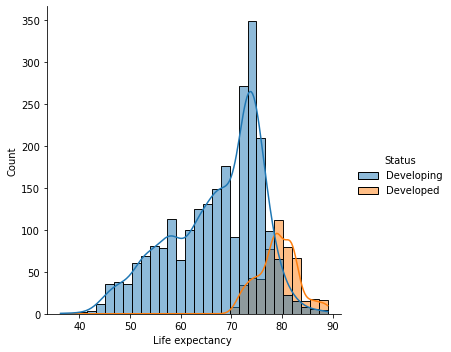

In [ ]:

sns.displot(data=df ,x ='Life expectancy ', hue="Status" , kde=True)


So, most of the life expectency falls exponentially after 75 .

In [ ]:
# The adult mortality rate shown in the World Development Indicators (WDI) database 
#and related products refers to that those who have reached age 15 will die before reaching age 60 
#(shown per 1,000 persons).
df['Adult Mortality']

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: Adult Mortality, Length: 2938, dtype: float64

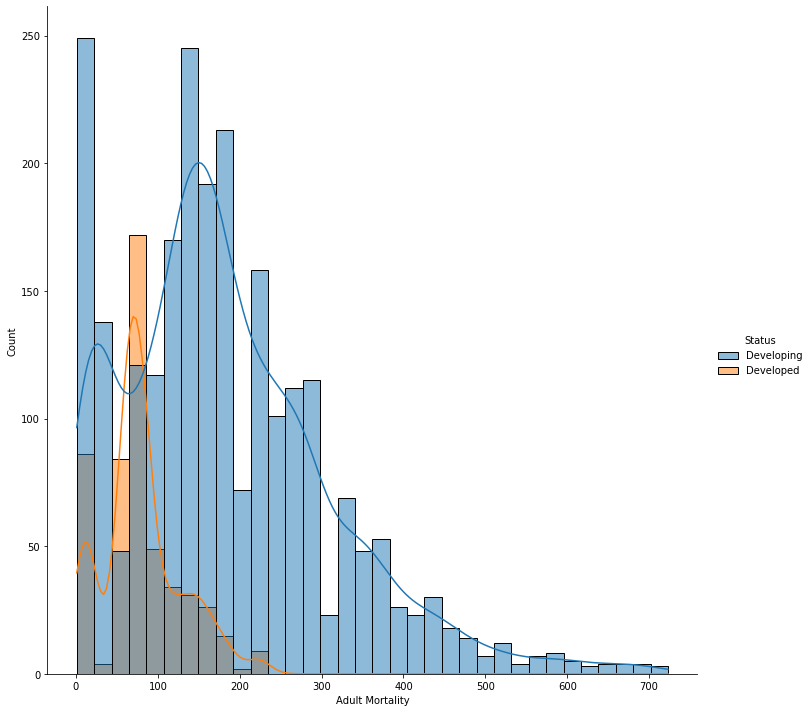

In [ ]:
sns.displot(data =df ,x ='Adult Mortality' ,hue ='Status' ,kde =True ,height =10)

In [ ]:
df['infant deaths']

0       62
1       64
2       66
3       69
4       71
        ..
2933    27
2934    26
2935    25
2936    25
2937    24
Name: infant deaths, Length: 2938, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


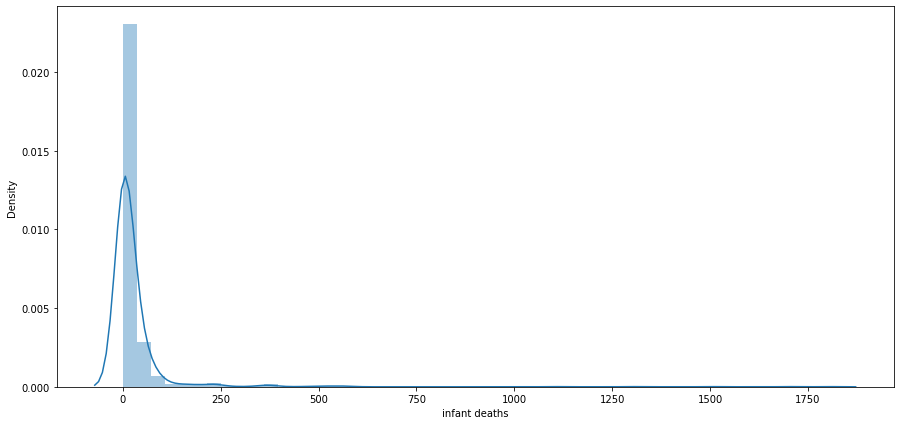

In [ ]:
sns.distplot(df['infant deaths'])

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df['GDP'].mean()

7483.158469138481

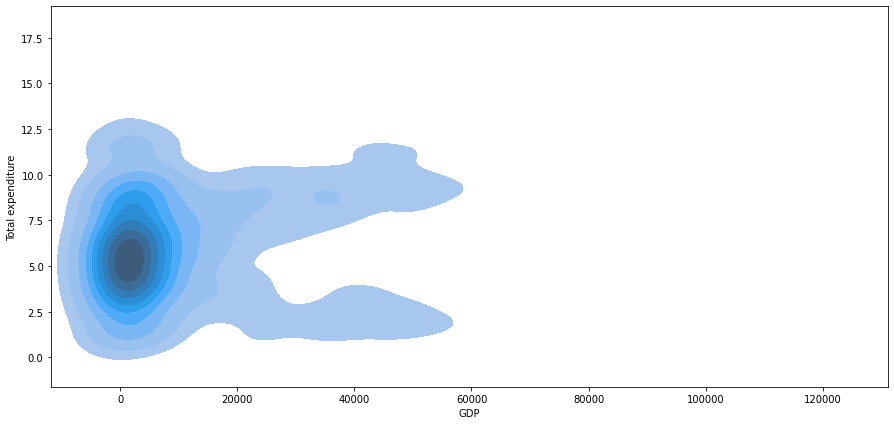

In [ ]:
#total expenditure .
sns.kdeplot(data=df, x='GDP', y= 'Total expenditure' , gridsize=200,fill =True)

$\bullet$ So, most of the expenditure is around 5.0  .

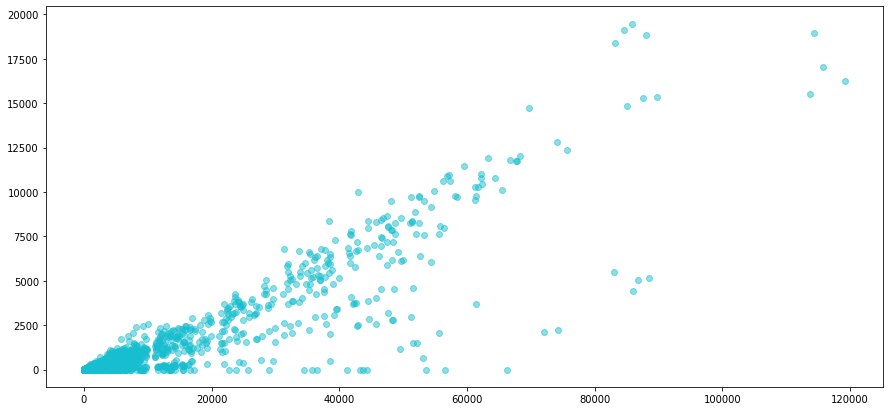

In [ ]:
plt.rcParams['figure.figsize'] =(15,7)
plt.scatter(df['GDP'] ,y =df['percentage expenditure'], alpha =0.5 ,c ='#17becf')
# plt.plot(df['GDP'] ,df['percentage expenditure'])
plt.show()


$\bullet$So , when there is high GDP , there is high expenditure .

$\bullet$But most of the data points are in the low GDP type 

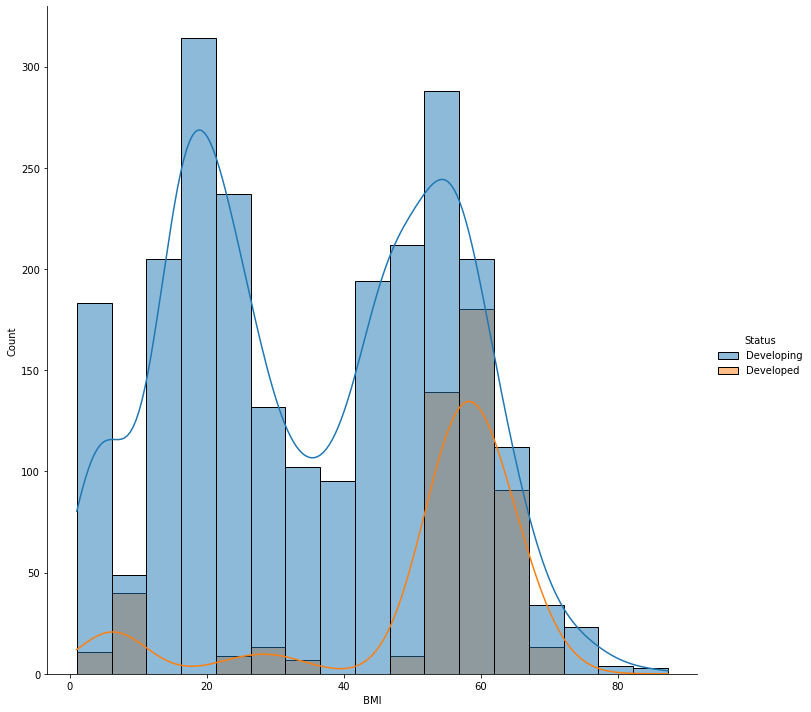

In [ ]:
sns.displot(data =df ,x =' BMI ' ,hue ='Status' ,kde =True ,height =10)
# sns.displot(df[' BMI '] ,hue ='Status')

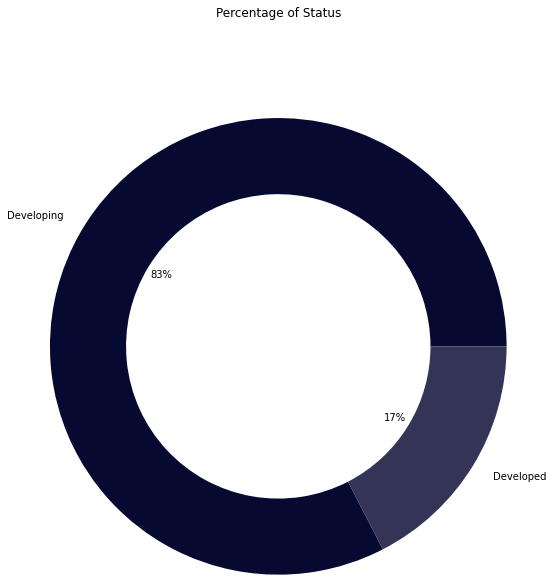

In [ ]:
# frequency of Status
base_freq = df.Status.value_counts()

# ploting a pie chart to show the percentage of rides for each base
plt.pie(base_freq.values, labels=base_freq.index,
        radius=1.5,
        autopct='%.0f%%',
        wedgeprops=dict(width=0.5),
        colors=['#060930','#333456','#595b83','#f4abc4','grey'])
plt.title('Percentage of Status', y=1.35);

In [ ]:
pd.DataFrame(df.Country.value_counts())

,Country
Iran (Islamic Republic of),16
Portugal,16
Kiribati,16
Kenya,16
Nigeria,16
...,...
Marshall Islands,1
Nauru,1
Monaco,1
San Marino,1


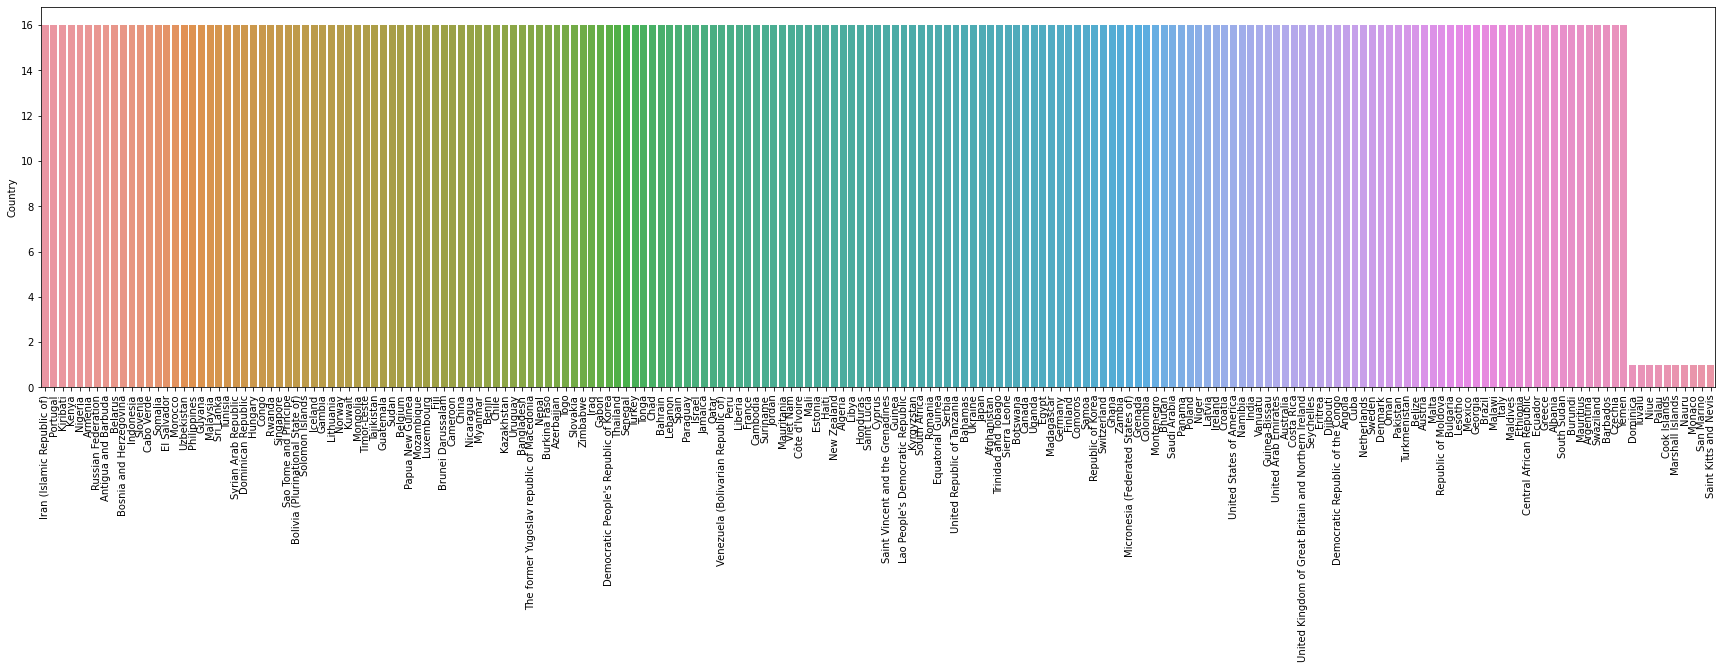

In [ ]:
# 

# sns.histplot(df.Country)
plt.rcParams['figure.figsize'] =(30,7) 
cont =df.Country.value_counts()

sns.barplot(x =cont.index ,y =cont)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
grouped_population = df.groupby(['Country'])

In [ ]:
#population
grp_cont =grouped_population.Population.agg(['sum' ,np.mean])

In [ ]:
grp_cont

,sum,mean
Country,,
Afghanistan,159556157.0,9.972260e+06
Albania,11150586.0,6.969116e+05
Algeria,346397239.0,2.164983e+07
Angola,162353587.0,1.014710e+07
Antigua and Barbuda,0.0,NaN
...,...,...
Venezuela (Bolivarian Republic of),0.0,NaN
Viet Nam,0.0,NaN
Yemen,0.0,NaN


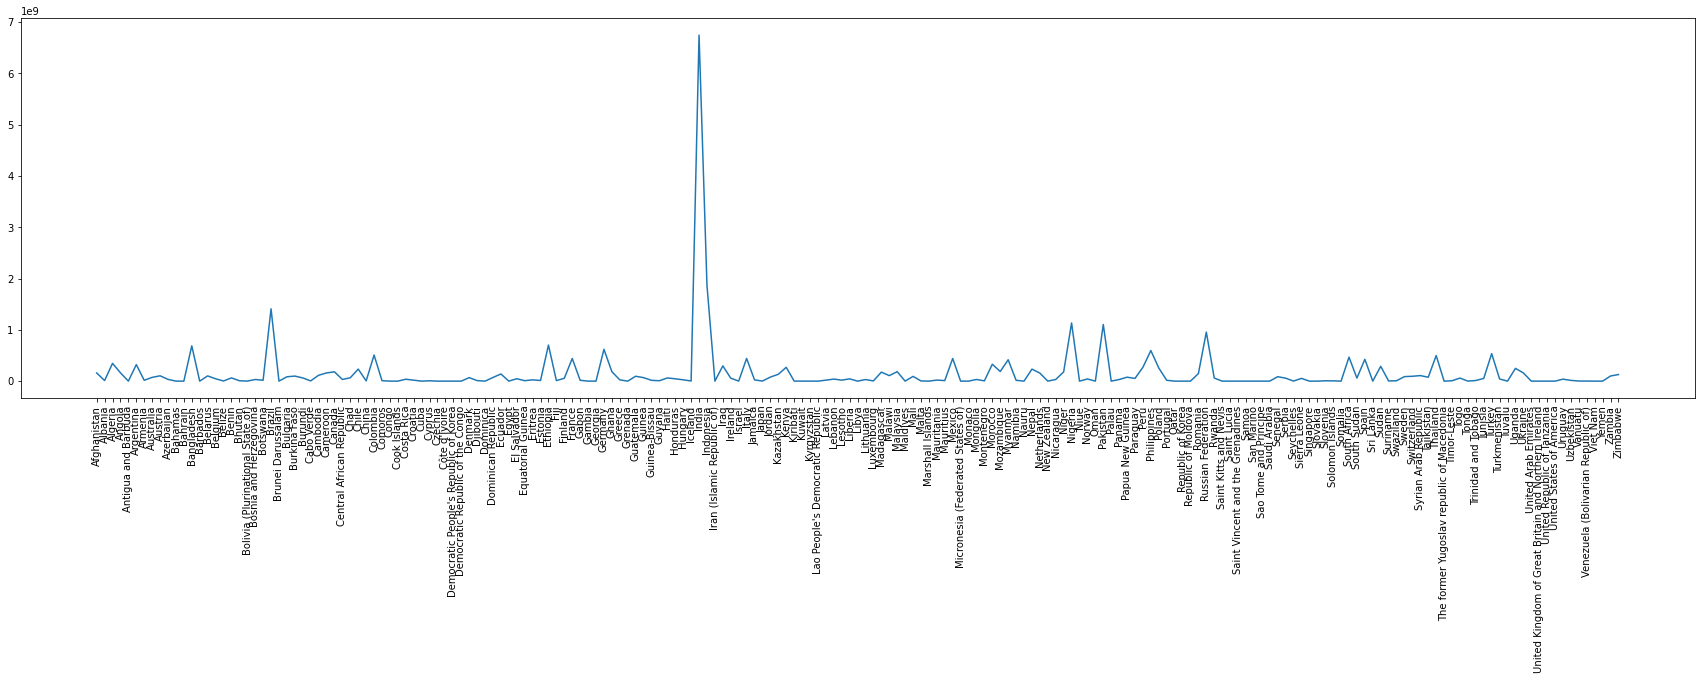

In [ ]:
plt.rcParams['figure.figsize'] =(30,7) 
plt.plot(grp_cont.index , grp_cont['sum'])
plt.xticks(rotation='vertical')
plt.show()

$\bullet$ India has the most population .

$\bullet$other countries has almost same population .

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
diseases =['Hepatitis B','Measles ' ,'Polio' ,'Diphtheria ',' HIV/AIDS']

In [ ]:
dis = df.groupby(['Country'])
dis =dis[diseases].agg('sum')

In [ ]:
dis

,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS
Country,,,,,
Afghanistan,1033.0,37796,774.0,837.0,1.6
Albania,1568.0,854,1570.0,1569.0,1.6
Algeria,936.0,31102,1468.0,1470.0,1.6
Angola,632.0,56981,738.0,763.0,37.9
Antigua and Barbuda,1474.0,0,1551.0,1573.0,2.0
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),1060.0,2640,1195.0,1096.0,1.6
Viet Nam,1138.0,67727,1519.0,1468.0,2.3
Yemen,891.0,44179,1074.0,1162.0,1.6


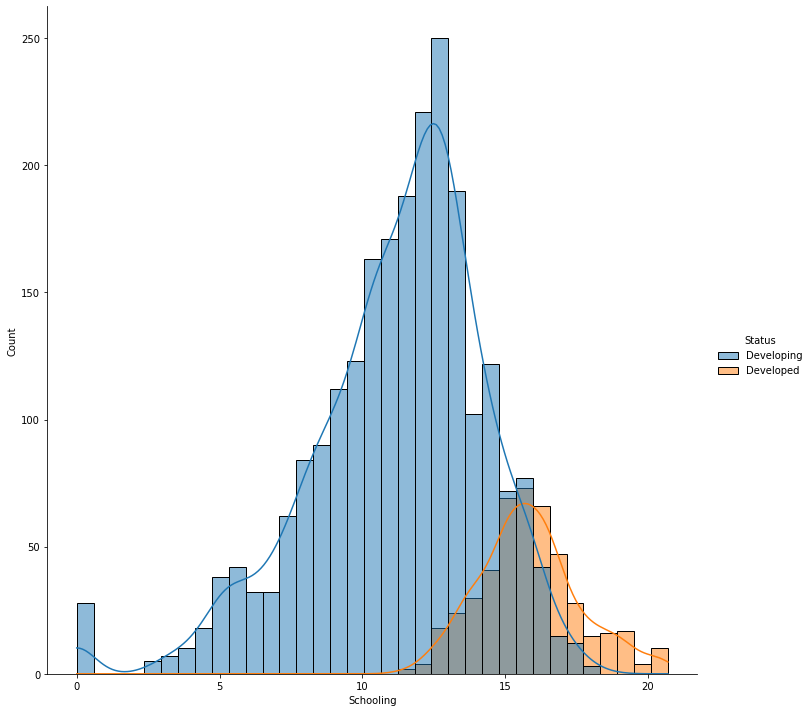

In [ ]:
# schooling
sns.displot(data =df ,x ='Schooling' ,hue ='Status' ,kde =True ,height =10)





1.   Schooling is Developed countries is more .




In [ ]:
#country ,year and schooling

df.groupby(['Country' ,'Year'])['Schooling'].agg('mean').unstack()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,5.5,5.9,6.2,6.5,6.8,7.9,8.1,8.4,8.7,8.9,9.2,9.5,9.8,9.9,10.0,10.1
Albania,10.7,10.6,10.7,10.7,10.9,10.8,11.4,11.6,12.0,12.2,12.5,13.3,14.2,14.2,14.2,14.2
Algeria,10.7,10.9,11.1,11.5,11.7,12.0,12.3,12.3,12.6,13.1,13.6,14.0,14.4,14.4,14.4,14.4
Angola,4.6,5.1,5.5,5.9,6.4,6.8,7.2,7.7,8.1,8.5,9.0,9.4,10.3,11.4,11.4,11.4
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,14.7,14.5,14.4,14.2,14.1,14.1,13.8,13.9,13.9,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),10.6,10.4,11.0,11.6,11.6,11.8,12.4,12.9,13.4,14.0,14.0,14.1,14.1,14.2,14.2,14.3
Viet Nam,10.4,10.6,10.7,10.9,11.0,11.1,11.3,11.4,11.6,11.7,11.9,12.0,12.2,12.3,12.5,12.6
Yemen,7.7,7.9,8.0,8.2,8.4,8.6,8.7,8.6,8.5,8.4,8.5,8.6,9.0,9.0,9.0,9.0


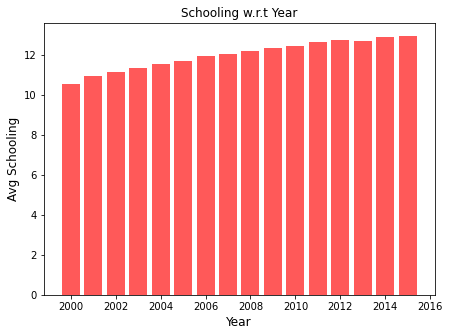

In [ ]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index, df.groupby('Year')['Schooling'].mean(),color='red',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Schooling",fontsize=12)
plt.title("Schooling w.r.t Year")
plt.show()

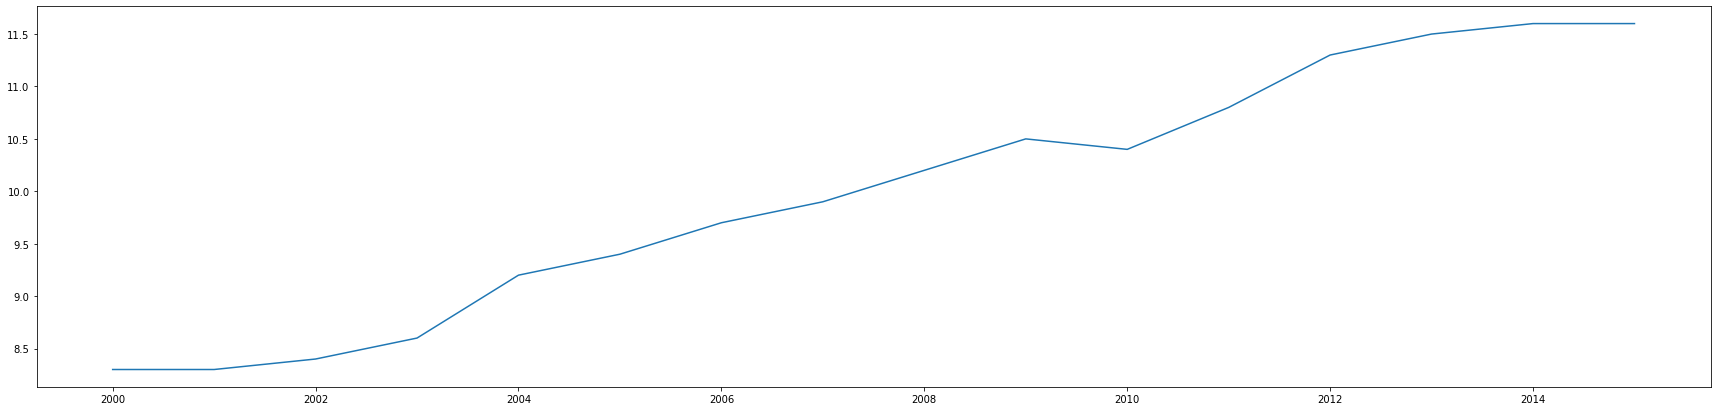

In [ ]:
#so , schooling for any country increases over time
x =df[df['Country']=='India']

plt.plot(x.Year ,x['Schooling'])

In [ ]:
df['Alcohol'].mode()

0    0.01
dtype: float64

In [ ]:
print(f'Most often number in alcohole {df["Alcohol"].mode()}')

Most often number in alcohole 0    0.01
dtype: float64


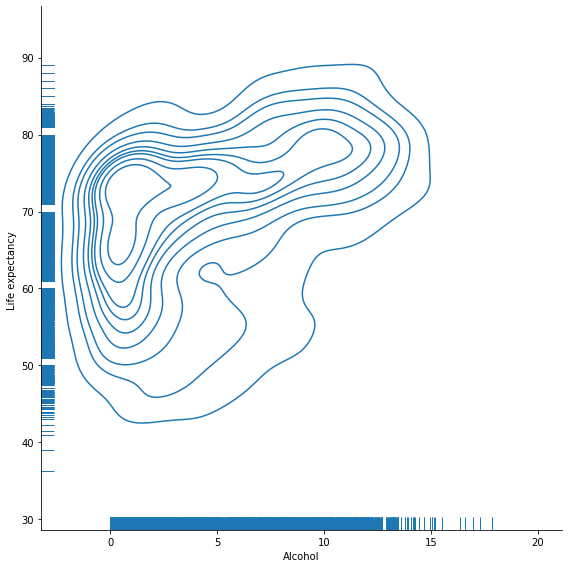

In [ ]:
#Alchohole vs life expectancy 

# plt.scatter(df['Alcohol'] ,df['Life expectancy '])
sns.displot(data=df, x='Alcohol', y='Life expectancy ',kind='kde' ,height=8, aspect=1 ,rug =True)


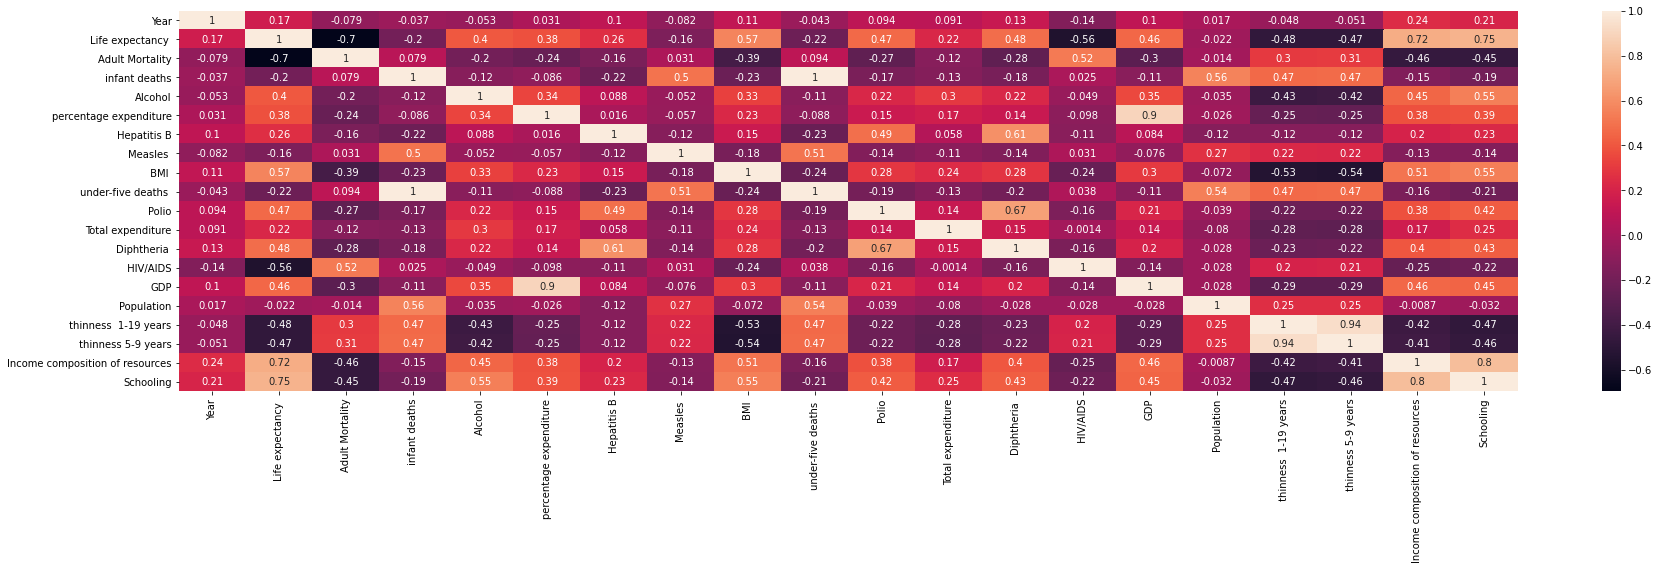

In [ ]:
#before preprocessing
sns.heatmap(df.corr() ,annot =True)

In [ ]:
country_list = df.Country.unique()
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [ ]:
for i in fill_list:

  df[i] =df[i].interpolate()

In [ ]:
#As , under five deaths and infant death are the  value , drop one of it

df =df.drop(['under-five deaths '] ,axis =1)



In [ ]:
#percentage expenditure and GDP are correlated heavily .
df['percentage expenditure'] =df['GDP']*df['percentage expenditure']

In [ ]:
df =df.drop(['GDP'] ,axis =1)

In [ ]:
df['income+schooling'] =df['Income composition of resources']*df['Schooling']

In [ ]:
df['thineness'] =df[' thinness  1-19 years']+df[' thinness 5-9 years']

df =df.drop([' thinness  1-19 years' ,' thinness 5-9 years'] ,axis =1)

In [ ]:
df.drop(['Schooling'] ,axis =1 ,inplace =True)

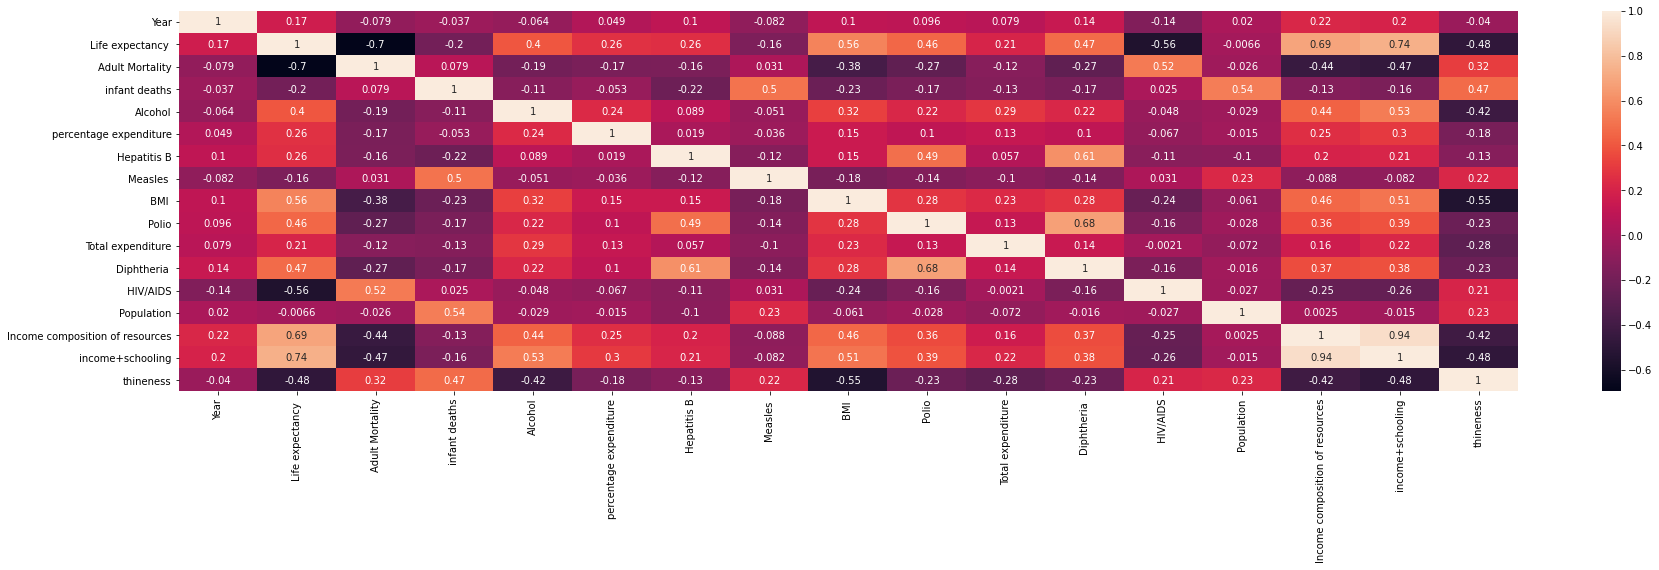

In [ ]:
sns.heatmap(df.corr() ,annot =True)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Country']= label_encoder.fit_transform(df['Country'])
df['Status'] =label_encoder.fit_transform(df['Status'])



In [ ]:
# percentage of null values in each column.
df.isnull().sum()*100/df.isnull().count()

In [ ]:
df.drop(['Hepatitis B'] ,axis =1,inplace =True)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.info()

<h1>Outlier Detection</h1>

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS',
       'Population', 'Income composition of resources', 'income+schooling',
       'thineness'],
      dtype='object')

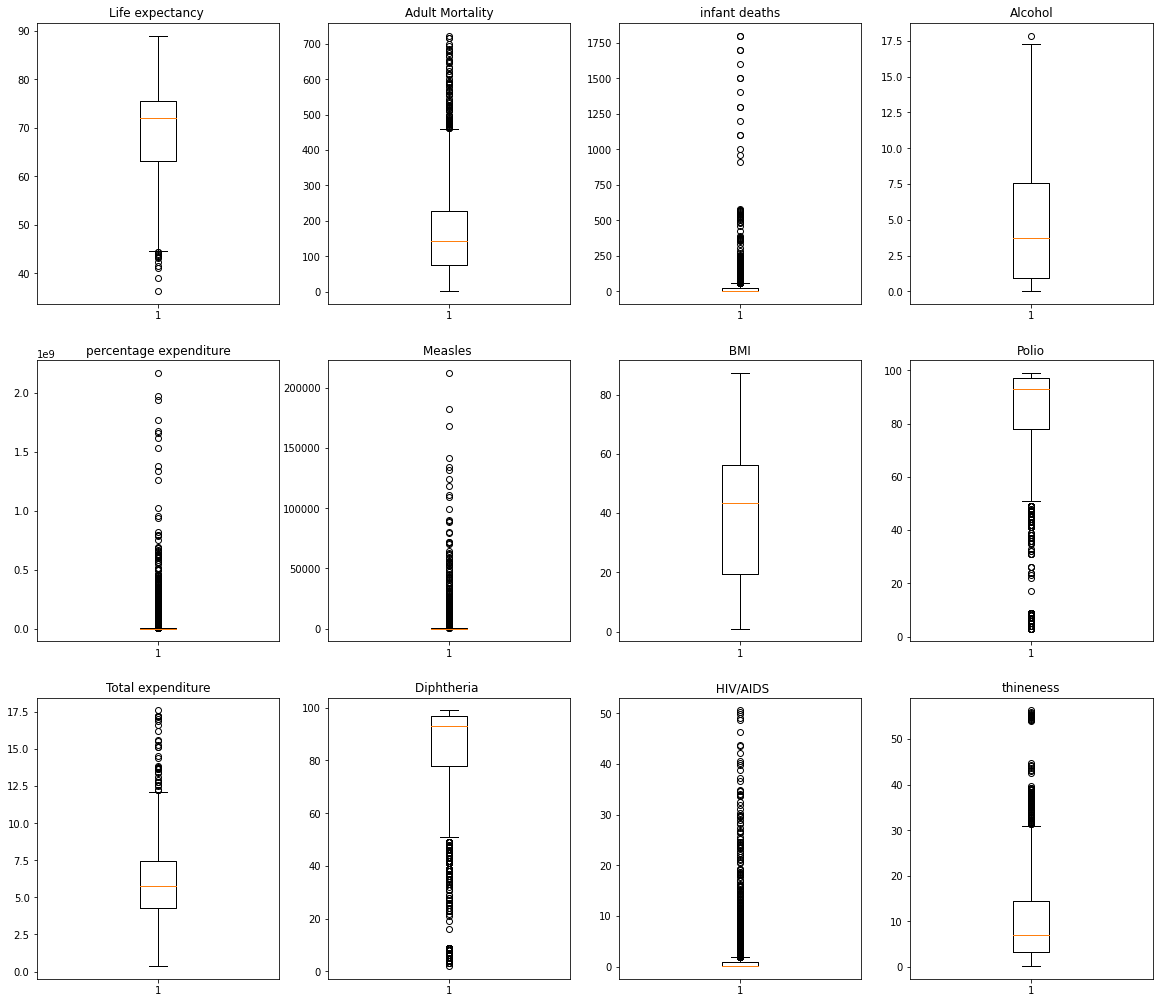

In [ ]:
# Create a dictionary of columns.
col_dict = {'Life expectancy ':1, 'Adult Mortality':2,
            'infant deaths':3, 'Alcohol':4,
            'percentage expenditure':5,'Measles ':6,
            ' BMI ':7,
            'Polio':8,'Total expenditure':9,
            'Diphtheria ':10,' HIV/AIDS':11,
            'thineness':12}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

In [ ]:
df.head(4)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,Income composition of resources,income+schooling,thineness
0,0,2015,1,65.0,263.0,62,0.01,41645.776585,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,0.479,4.8379,34.5
1,0,2014,1,59.9,271.0,64,0.01,45047.642192,492,18.6,58.0,8.18,62.0,0.1,327582.0,0.476,4.7600,35.0
2,0,2013,1,59.9,268.0,66,0.01,46255.888735,430,18.1,62.0,8.13,64.0,0.1,31731688.0,0.470,4.6530,35.4
3,0,2012,1,59.5,272.0,69,0.01,52380.218698,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,0.463,4.5374,35.9


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['Life expectancy '],axis=1).values
y = df.iloc[:, 3].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df =scaler.fit_transform(x)

In [ ]:
df.shape

In [ ]:
y.shape

(2938,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LinearRegression


lr =LinearRegression()
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'Thr R2 core for liner regression is : {lr.score(x_test ,y_test)}')

Thr R2 core for liner regression is : 0.793391349971614
